<a href="https://colab.research.google.com/github/areegtarek/Named-Entity-Recognition-of-Financial-Metrics-in-Earnings-Call-Transcripts-using-BERT/blob/main/Named_Entity_Recognition_Model_using_Bert.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Named Entity Recognition of Financial Metrics in Earnings Call Transcripts using BERT**

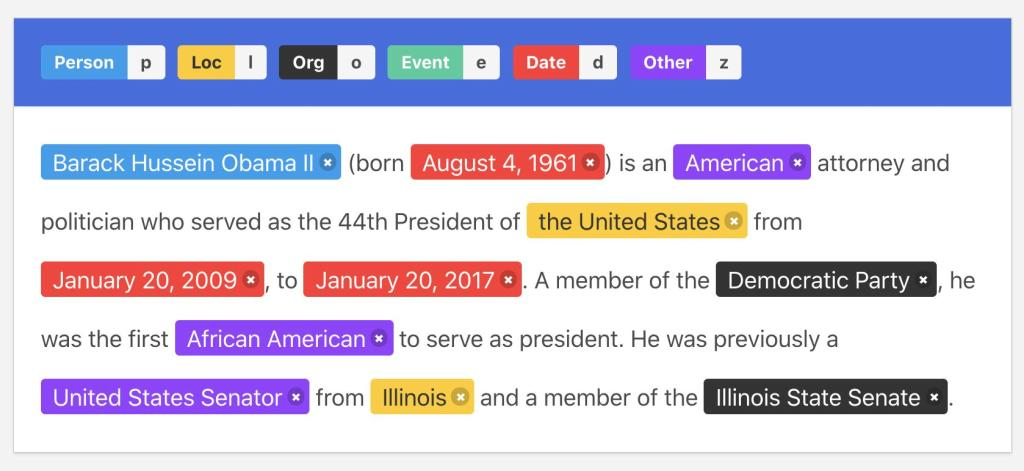

# **Overview**
I have **Fine tuned BERT using HuggingFace transformers** to perform **Named Entity Recognition** on Text data. BERT is a state-of-the-art model with **attention mechanism** as underlying architecture trained with masked-language-modelling and next-sentence-prediction objectives, used for various tasks including Question answering systems, Text Summarization etc... which can also perform token classification tasks such as NER with great performance.

# **Importing Necessary Libraries and datasets**

In [ ]:
# Installing git-lfs and setting up
# git repo to push model and tokenizer to the hub

!apt-get install git-lfs
!git init
!git lfs install

Reading package lists... Done
Building dependency tree       
Reading state information... Done
git-lfs is already the newest version (2.9.2-1).
0 upgraded, 0 newly installed, 0 to remove and 6 not upgraded.
Initialized empty Git repository in /kaggle/working/.git/
Updated git hooks.
Git LFS initialized.


In [ ]:
! pip install datasets

In [ ]:
! pip install seqeval

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 kB 3.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for seqeval: filename=seqeval-1.2.2-py3-none-any.whl size=16181 sha256=d0a16a655e87cd3fc2a24092403c476833346f4b48a2b7a56371b345d6e37936
  Stored in directory: /root/.cache/pip/wheels/1a/67/4a/ad4082dd7dfc30f2abfe4d80a2ed5926a506eb8a972b4767fa
Successfully built seqeval


In [ ]:
! pip install transformers

# **Loading Dataset**

# **Data**
**FiNER-139 :** is comprised of 1.1M sentences annotated with eXtensive Business Reporting Language (XBRL) tags extracted from annual and quarterly reports of publicly-traded companies in the US. Unlike other entity extraction tasks, like named entity recognition (NER) or contract element extraction, which typically require identifying entities of a small set of common types (e.g., persons, organizations), FiNER-139 uses a much larger label set of 139 entity types. Another important difference from typical entity extraction is that FiNER focuses on numeric tokens, with the correct tag depending mostly on context, not the token itself..

**Link :** https://huggingface.co/datasets/nlpaueb/finer-139

In [ ]:
import datasets

# Load the dataset
dataset = datasets.load_dataset('nlpaueb/finer-139')

Generating train split:   0%|          | 0/900384 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/112494 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/108378 [00:00<?, ? examples/s]

Dataset finer139 downloaded and prepared to /root/.cache/huggingface/datasets/nlpaueb___finer139/finer-139/1.0.0/5f5a8eb2a38e8b142bb8ca63f3f9600634cc6c8963e4c982926cf2b48e4e55ff. Subsequent calls will reuse this data.


  0%|          | 0/3 [00:00<?, ?it/s]

In [ ]:
dataset

DatasetDict({
    train: Dataset({
        features: ['id', 'tokens', 'ner_tags'],
        num_rows: 900384
    })
    validation: Dataset({
        features: ['id', 'tokens', 'ner_tags'],
        num_rows: 112494
    })
    test: Dataset({
        features: ['id', 'tokens', 'ner_tags'],
        num_rows: 108378
    })
})

In [ ]:
# work on sample
import random

num_samples = 10000

In [ ]:
# Access train
train = random.sample(list(dataset['train']), num_samples)
print(train)

# Access validation
valid =random.sample(list(dataset['validation']), num_samples)

# Access test
test = random.sample(list(dataset['test']), num_samples)

[{'id': 652289, 'tokens': ['The', 'all', '-', 'cash', 'transaction', 'is', 'subject', 'to', 'regulatory', 'approval', 'and', 'to', 'customary', 'closing', 'conditions', 'and', 'is', 'expected', 'to', 'close', 'in', 'the', 'fourth', 'quarter', 'of', '2019', '.'], 'ner_tags': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]}, {'id': 126615, 'tokens': ['Quarterly', 'Results', 'of', 'Operations', '(', 'Unaudited', ')', 'The', 'following', 'is', 'a', 'summary', 'of', 'our', 'unaudited', 'quarterly', 'results', 'of', 'operations', 'for', 'the', 'years', 'ended', 'December', '31', ',', '2018', 'and', '2017', '(', 'in', 'thousands', ',', 'except', 'per', 'share', 'data', ')', '.'], 'ner_tags': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]}, {'id': 736105, 'tokens': ['On', 'December', '14', ',', '2018', ',', 'a', 'U.S.', 'District', 'Court', 'Judge', 'in', 'the', 'Northern', 'District', 'of'

In [ ]:
print(f'Train rows: {len(train)}')
print(f'Valid rows: {len(valid)}')
print(f'Test rows: {len(test)}')

Train rows: 10000
Valid rows: 10000
Test rows: 10000


In [ ]:
'''from datasets import load_dataset'''

'from datasets import load_dataset'

In [ ]:
'''raw_dataset = load_dataset("conll2003")'''

'raw_dataset = load_dataset("conll2003")'

In [ ]:
'''raw_dataset'''

'raw_dataset'

In [ ]:
print(dataset["train"][0]["tokens"])
print(dataset["train"][0]["ner_tags"])

['ITEM', '1', 'Financial', 'Statements', 'Lennar', 'Corporation', 'and', 'Subsidiaries', 'Condensed', 'Consolidated', 'Balance', 'Sheets', '(', 'Dollars', 'in', 'thousands', ',', 'except', 'shares', 'and', 'per', 'share', 'amounts', ')', '(', 'unaudited', ')', '(', '1', ')', 'Under', 'certain', 'provisions', 'of', 'Accounting', 'Standards', 'Codification', '(', '“', 'ASC', '”', ')', 'Topic', '810', ',', 'Consolidations', ',', '(', '“', 'ASC', '810', '”', ')', 'the', 'Company', 'is', 'required', 'to', 'separately', 'disclose', 'on', 'its', 'condensed', 'consolidated', 'balance', 'sheets', 'the', 'assets', 'owned', 'by', 'consolidated', 'variable', 'interest', 'entities', '(', '“', 'VIEs', '”', ')', 'and', 'liabilities', 'of', 'consolidated', 'VIEs', 'as', 'to', 'which', 'neither', 'Lennar', 'Corporation', ',', 'or', 'any', 'of', 'its', 'subsidiaries', ',', 'has', 'any', 'obligations', '.', 'As', 'of', 'May', '31', ',', '2016', ',', 'total', 'assets', 'include', '$', '645.1', 'million', 

In [ ]:
dataset_feature = dataset["train"].features
print(dataset_feature)

{'id': Value(dtype='int32', id=None), 'tokens': Sequence(feature=Value(dtype='string', id=None), length=-1, id=None), 'ner_tags': Sequence(feature=ClassLabel(num_classes=279, names=['O', 'B-AccrualForEnvironmentalLossContingencies', 'B-AcquiredFiniteLivedIntangibleAssetsWeightedAverageUsefulLife', 'I-AcquiredFiniteLivedIntangibleAssetsWeightedAverageUsefulLife', 'B-AllocatedShareBasedCompensationExpense', 'B-AmortizationOfFinancingCosts', 'B-AmortizationOfIntangibleAssets', 'I-AmortizationOfIntangibleAssets', 'B-AntidilutiveSecuritiesExcludedFromComputationOfEarningsPerShareAmount', 'I-AntidilutiveSecuritiesExcludedFromComputationOfEarningsPerShareAmount', 'B-AreaOfRealEstateProperty', 'I-AreaOfRealEstateProperty', 'B-AssetImpairmentCharges', 'B-BusinessAcquisitionEquityInterestsIssuedOrIssuableNumberOfSharesIssued', 'B-BusinessAcquisitionPercentageOfVotingInterestsAcquired', 'I-BusinessAcquisitionPercentageOfVotingInterestsAcquired', 'B-BusinessCombinationAcquisitionRelatedCosts', 'B-

In [ ]:
print(dataset_feature["ner_tags"])

Sequence(feature=ClassLabel(num_classes=279, names=['O', 'B-AccrualForEnvironmentalLossContingencies', 'B-AcquiredFiniteLivedIntangibleAssetsWeightedAverageUsefulLife', 'I-AcquiredFiniteLivedIntangibleAssetsWeightedAverageUsefulLife', 'B-AllocatedShareBasedCompensationExpense', 'B-AmortizationOfFinancingCosts', 'B-AmortizationOfIntangibleAssets', 'I-AmortizationOfIntangibleAssets', 'B-AntidilutiveSecuritiesExcludedFromComputationOfEarningsPerShareAmount', 'I-AntidilutiveSecuritiesExcludedFromComputationOfEarningsPerShareAmount', 'B-AreaOfRealEstateProperty', 'I-AreaOfRealEstateProperty', 'B-AssetImpairmentCharges', 'B-BusinessAcquisitionEquityInterestsIssuedOrIssuableNumberOfSharesIssued', 'B-BusinessAcquisitionPercentageOfVotingInterestsAcquired', 'I-BusinessAcquisitionPercentageOfVotingInterestsAcquired', 'B-BusinessCombinationAcquisitionRelatedCosts', 'B-BusinessCombinationConsiderationTransferred1', 'B-BusinessCombinationContingentConsiderationLiability', 'B-BusinessCombinationReco

In [ ]:
ner_labels = dataset_feature["ner_tags"].feature.names
print(ner_labels)    # all NER labels

['O', 'B-AccrualForEnvironmentalLossContingencies', 'B-AcquiredFiniteLivedIntangibleAssetsWeightedAverageUsefulLife', 'I-AcquiredFiniteLivedIntangibleAssetsWeightedAverageUsefulLife', 'B-AllocatedShareBasedCompensationExpense', 'B-AmortizationOfFinancingCosts', 'B-AmortizationOfIntangibleAssets', 'I-AmortizationOfIntangibleAssets', 'B-AntidilutiveSecuritiesExcludedFromComputationOfEarningsPerShareAmount', 'I-AntidilutiveSecuritiesExcludedFromComputationOfEarningsPerShareAmount', 'B-AreaOfRealEstateProperty', 'I-AreaOfRealEstateProperty', 'B-AssetImpairmentCharges', 'B-BusinessAcquisitionEquityInterestsIssuedOrIssuableNumberOfSharesIssued', 'B-BusinessAcquisitionPercentageOfVotingInterestsAcquired', 'I-BusinessAcquisitionPercentageOfVotingInterestsAcquired', 'B-BusinessCombinationAcquisitionRelatedCosts', 'B-BusinessCombinationConsiderationTransferred1', 'B-BusinessCombinationContingentConsiderationLiability', 'B-BusinessCombinationRecognizedIdentifiableAssetsAcquiredAndLiabilitiesAssum

**Description of some of the key tags:**

- B-XXX - Label for the beginning of a named entity
- I-XXX - Label for inside/continuing a named entity
- O - Label for outside of a named entity

**Example entity tags:**

- BusinessCombination - Tags related to business combinations/mergers/acquisitions
- Assets/Liabilities - Tags for asset and liability line items
- IntangibleAssets - Tags for intangible asset values
- DebtInstrument - Tags related to debt instruments like bonds
- InterestExpense - Interest expense value
- Goodwill - Goodwill asset value
- ShareBasedCompensation - Share-based compensation expense
- Revenue - Tags for different revenue line items
- IncomeTaxExpenseBenefit - Income tax expense/benefit
- OperatingLease - Tags related to operating lease values
- CashAndCashEquivalents - Cash and cash equivalents values
- CommonStock - Tags relating to common stock like shares outstanding
- Equity - Tags relating to equity values
- Expenses - Tags for different expense line items
- PropertyPlantEquipment - Tags relating to PPE assets
- Inventory - Tags relating to inventory values
- Investments - Tags relating to investment holdings
- ContractLiabilities - Tags relating to contract liabilities
- Restructuring - Tags relating to restructuring costs
- TreasuryStock - Tags relating to treasury stock transactions
- StockRepurchase - Tags relating to stock repurchases
- Securities - Tags relating to holdings of securities
- Guarantees - Tags relating to maximum guarantee exposures
- Derivatives - Tags relating to derivative contract details
- LossContingencies - Tags relating to litigation accruals

In [ ]:
# labels and respective ids are required to
# support inference API on huggingFace website

id2label = {str(i): label for i, label in enumerate(ner_labels)}
label2id = {value: key for key, value in id2label.items()}

In [ ]:
model_checkpoint = "bert-base-cased"

# **Importing Tokenizer**

In [ ]:
from transformers import AutoTokenizer

In [ ]:
tokenizer = AutoTokenizer.from_pretrained(model_checkpoint)

In [ ]:
sample_input = tokenizer(dataset["train"][0]["tokens"], is_split_into_words=True)

This tokenizer is different from normal tokenizer since it uses **subword tokenization** technique ( Splits single word into multiple tokens ). <br>Hence **word_ids** are used to keep track of the words ( sub-words of same word have same word_id ).

In [ ]:
print(sample_input.tokens())
print(sample_input.word_ids())

['[CLS]', 'IT', '##EM', '1', 'Financial', 'State', '##ments', 'Len', '##nar', 'Corporation', 'and', 'Sub', '##si', '##dia', '##ries', 'Con', '##den', '##sed', 'Consolidated', 'Ba', '##lance', 'She', '##ets', '(', 'Dollar', '##s', 'in', 'thousands', ',', 'except', 'shares', 'and', 'per', 'share', 'amounts', ')', '(', 'un', '##aud', '##ited', ')', '(', '1', ')', 'Under', 'certain', 'provisions', 'of', 'Accounting', 'Standards', 'Co', '##di', '##fication', '(', '“', 'AS', '##C', '”', ')', 'Top', '##ic', '81', '##0', ',', 'Con', '##sol', '##ida', '##tions', ',', '(', '“', 'AS', '##C', '81', '##0', '”', ')', 'the', 'Company', 'is', 'required', 'to', 'separately', 'disc', '##lose', 'on', 'its', 'con', '##den', '##sed', 'consolidated', 'balance', 'sheets', 'the', 'assets', 'owned', 'by', 'consolidated', 'variable', 'interest', 'entities', '(', '“', 'VI', '##Es', '”', ')', 'and', 'l', '##ia', '##bilities', 'of', 'consolidated', 'VI', '##Es', 'as', 'to', 'which', 'neither', 'Len', '##nar', 'Cor

In [ ]:
print(dataset["train"][0]["ner_tags"])

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 66, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 66, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


After tokenization, There is a mismatch between tokens and labels.
<br>The following function rectifies it.

In [ ]:
def align_labels_and_tokens(word_ids, labels):

    """ Aligns tokens and their respective labels

    Args:
        word_ids (list): word ids of tokens after subword tokenization.
        labels (list): original labels irrespective of subword tokenization.

    Returns:
        updated_labels (list): labels aligned with respective tokens.

    """

    updated_labels = []
    current_word = None
    for word_id in word_ids:
        if word_id != current_word:
            current_word = word_id
            updated_labels.append(-100 if word_id is None else labels[word_id])
        elif word_id is None:
            updated_labels.append(-100)
        else:
            label = labels[word_id]
            # B-XXX to I-XXX for subwords (Inner entities)
            if label % 2 == 1:
                label+=1
            updated_labels.append(label)
    return updated_labels


In [ ]:
sample_labels = dataset["train"][0]["ner_tags"]
print(sample_labels)
print(align_labels_and_tokens(sample_input.word_ids(), sample_labels))

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 66, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 66, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[-100, 0, 0, 0, 

In [ ]:
def tokenize_and_align_labels(dataset):

    """ Performs tokenization and aligns all tokens and labels
        in the dataset.

    Args:
        dataset (DatasetDict): dataset containing tokens and labels.

    Returns:
        tokenized_data (dict): contains input_ids, attention_mask, token_type_ids, labels

    """

    tokenized_data = tokenizer(dataset["tokens"], truncation=True, is_split_into_words=True)
    all_labels = dataset["ner_tags"]
    updated_labels = []
    for i, labels in enumerate(all_labels):
        updated_labels.append(align_labels_and_tokens(tokenized_data.word_ids(i), labels))
    tokenized_data["labels"] = updated_labels
    return tokenized_data


In [ ]:
tokenize_and_align_labels(dataset['train'][:5])

{'input_ids': [[101, 9686, 15577, 122, 7748, 1426, 4385, 22824, 13380, 3436, 1105, 12859, 5053, 7168, 3377, 16752, 2883, 5591, 23582, 18757, 13831, 1153, 6248, 113, 21530, 1116, 1107, 4674, 117, 2589, 6117, 1105, 1679, 2934, 7919, 114, 113, 8362, 16631, 10334, 114, 113, 122, 114, 2831, 2218, 8939, 1104, 23693, 14365, 3291, 3309, 11531, 113, 789, 15278, 1658, 790, 114, 3299, 1596, 5615, 1568, 117, 16752, 24313, 6859, 6126, 117, 113, 789, 15278, 1658, 5615, 1568, 790, 114, 1103, 1881, 1110, 2320, 1106, 10380, 6187, 20316, 1113, 1157, 14255, 2883, 5591, 13511, 5233, 8675, 1103, 6661, 2205, 1118, 13511, 7898, 2199, 11659, 113, 789, 7118, 27485, 790, 114, 1105, 181, 1465, 15951, 1104, 13511, 7118, 27485, 1112, 1106, 1134, 4534, 22824, 13380, 3436, 117, 1137, 1251, 1104, 1157, 22423, 117, 1144, 1251, 15337, 119, 1249, 1104, 1318, 1955, 117, 1446, 117, 1703, 6661, 1511, 109, 3324, 1571, 119, 122, 1550, 2272, 1106, 13511, 7118, 27485, 1104, 1134, 109, 129, 119, 123, 1550, 1110, 1529, 1107, 228

In [ ]:
tokenized_dataset = dataset.map(
    tokenize_and_align_labels,
    batched = True,
    remove_columns = dataset["train"].column_names
)

  0%|          | 0/901 [00:00<?, ?ba/s]

  0%|          | 0/113 [00:00<?, ?ba/s]

  0%|          | 0/109 [00:00<?, ?ba/s]

In [ ]:
from transformers import DataCollatorForTokenClassification

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: l

In [ ]:
# Data collator pads inputs and labels
data_collator = DataCollatorForTokenClassification(
    tokenizer = tokenizer
)

# **Importing model**

In [ ]:
from transformers import AutoModelForTokenClassification, TrainingArguments, Trainer

model = AutoModelForTokenClassification.from_pretrained(
    model_checkpoint,
    num_labels=len(ner_labels),
    id2label = id2label,
    label2id = label2id
)

Some weights of the model checkpoint at bert-base-cased were not used when initializing BertForTokenClassification: ['cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.bias', 'cls.seq_relationship.bias', 'cls.seq_relationship.weight']
- This IS expected if you are initializing BertForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForTokenClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForTokenClassification were not initialized from the model checkpoint at bert-base-cased and are newly initialized: ['cl

In [ ]:
# Specifying training arguments

batch_size = 32

args = TrainingArguments(
    model_checkpoint,
    evaluation_strategy = "epoch",
    learning_rate=2e-5,
    per_device_train_batch_size=batch_size,
    per_device_eval_batch_size=batch_size,
    num_train_epochs=3,
    weight_decay=0.01
)

In [ ]:
from datasets import load_metric
import numpy as np

In [ ]:
# Loading helper function to compute metrics
metric = load_metric("seqeval")

In [ ]:
def compute_metrics(p):

    """ Computes and returns metrics during training.

    Args:
        p (tuple): tuple containing predictions, labels as lists.

    Returns:
        dict: Dictionary containing precision, recall, f1 score, accuracy.

    """

    predictions, labels = p
    predictions = np.argmax(predictions, axis=2)
    true_predictions = [
        [ner_labels[p] for (p, l) in zip(prediction, label) if l != -100]
        for prediction, label in zip(predictions, labels)
    ]
    true_labels = [
        [ner_labels[l] for (p, l) in zip(prediction, label) if l != -100]
        for prediction, label in zip(predictions, labels)
    ]
    metrics = metric.compute(predictions=true_predictions, references=true_labels)

    return {
        "precision": metrics["overall_precision"],
        "recall": metrics["overall_recall"],
        "f1": metrics["overall_f1"],
        "accuracy": metrics["overall_accuracy"]
    }


# **Fine-tuning**

In [ ]:
trainer = Trainer(
    model,
    args,
    train_dataset = tokenized_dataset["train"],
    eval_dataset = tokenized_dataset["validation"],
    data_collator = data_collator,
    tokenizer = tokenizer,
    compute_metrics = compute_metrics
)

In [ ]:
trainer.train()    # Fine-tunes model on downstream task

/opt/conda/lib/python3.10/site-packages/transformers/optimization.py:411: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(
wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit:

  ·····································


wandb: ERROR API key must be 40 characters long, yours was 37
wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit:

  ·····································


wandb: ERROR API key must be 40 characters long, yours was 37
wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit:

  ········································


wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


You're using a BertTokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.


# **Pushing model to hub**

In [ ]:
from huggingface_hub import interpreter_login

interpreter_login()


    _|    _|  _|    _|    _|_|_|    _|_|_|  _|_|_|  _|      _|    _|_|_|      _|_|_|_|    _|_|      _|_|_|  _|_|_|_|
    _|    _|  _|    _|  _|        _|          _|    _|_|    _|  _|            _|        _|    _|  _|        _|
    _|_|_|_|  _|    _|  _|  _|_|  _|  _|_|    _|    _|  _|  _|  _|  _|_|      _|_|_|    _|_|_|_|  _|        _|_|_|
    _|    _|  _|    _|  _|    _|  _|    _|    _|    _|    _|_|  _|    _|      _|        _|    _|  _|        _|
    _|    _|    _|_|      _|_|_|    _|_|_|  _|_|_|  _|      _|    _|_|_|      _|        _|    _|    _|_|_|  _|_|_|_|
    
    To login, `huggingface_hub` requires a token generated from https://huggingface.co/settings/tokens .


Token:  ·····································
Add token as git credential? (Y/n)  Y


Token is valid (permission: read).
Cannot authenticate through git-credential as no helper is defined on your machine.
You might have to re-authenticate when pushing to the Hugging Face Hub.
Run the following command in your terminal in case you want to set the 'store' credential helper as default.

git config --global credential.helper store

Read https://git-scm.com/book/en/v2/Git-Tools-Credential-Storage for more details.
Token has not been saved to git credential helper.
Your token has been saved to /root/.cache/huggingface/token
Login successful


In [ ]:
repo_name = "areegtarek/Finbert-finetuned-NER-sm"
model.save_pretrained(repo_name, push_to_hub=True)
tokenizer.push_to_hub(repo_name)

# **Evaluating the model**

In [ ]:
import pandas as pd
import matplotlib
from IPython.display import display

matplotlib.style.use('fivethirtyeight')

In [ ]:
predictions, labels, _ = trainer.predict(tokenized_dataset["test"])
predictions = np.argmax(predictions, axis=2)

true_predictions = [
    [ner_labels[p] for (p, l) in zip(prediction, label) if l != -100]
    for prediction, label in zip(predictions, labels)
]
true_labels = [
    [ner_labels[l] for (p, l) in zip(prediction, label) if l != -100]
    for prediction, label in zip(predictions, labels)
]

results = metric.compute(predictions=true_predictions, references=true_labels)

In [ ]:
#results_df = pd.DataFrame({"LOC": results["LOC"], "MISC": results["MISC"], "ORG": results["ORG"], "PER": results["PER"]}).drop("number", axis=0)

In [ ]:
display(results_df)

In [ ]:
results_df.plot(kind="bar", rot=0, figsize=(12,8))
matplotlib.pyplot.title("Performance on Test data")
matplotlib.pyplot.show()

# **Inference**

In [ ]:
from transformers import pipeline

# Loading the pipeline from hub
# Pipeline handles the preprocessing and post processing steps
model_checkpoint = "areegtarek/Finbert-finetuned-NER-sm"
namedEntityRecogniser = pipeline(
    "token-classification", model=model_checkpoint, aggregation_strategy="simple"
)

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: l

In [ ]:
text = "Mark Zuckerberg is one of the founders of Facebook, a company from the United States"

In [ ]:
sample_output = namedEntityRecogniser([text])

In [ ]:
print(sample_output)

[[{'entity_group': 'PER', 'score': 0.9986679, 'word': 'Mark Zuckerberg', 'start': 0, 'end': 15}, {'entity_group': 'ORG', 'score': 0.98492104, 'word': 'Facebook', 'start': 42, 'end': 50}, {'entity_group': 'LOC', 'score': 0.99367756, 'word': 'United States', 'start': 71, 'end': 84}]]


In [ ]:
from spacy import displacy

In [ ]:
def visualize(pipeline_output, texts):

    """ Visualizes text and their Named entities.

    Args:
        pipeline_output (list): Output of the pipeline.
        texts (list): List containing original text.

    Returns:
        Nothing

    """

    for i in range(len(sample_output)):
        entities = []
        for ents in sample_output[i]:
            entities.append({"end": ents["end"], "label": ents["entity_group"], "start": ents["start"]})
        displacy.render({
            "ents": entities,
            "text": texts[i]
        }, style="ent", manual=True)


In [ ]:
visualize(sample_output, [text])